In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
file_path = "..\Data_Files\suicide-lghc-indicator-21\suicide-lghc-indicator-21.csv"
suicide_raw = pd.read_csv(file_path)
suicide_df = pd.DataFrame(suicide_raw)

suicide_df

,Indicator,Geography,Year,Strata,Strata Name,Numerator,Denominator,Rate,Age Adjusted Rate
0,Suicide,CALIFORNIA,2000,Sex,Female,682,17080000,3.993,4.067
1,Suicide,CALIFORNIA,2000,Sex,Male,2431,16920000,14.370,15.890
2,Suicide,CALIFORNIA,2000,Sex,Total,3113,34000000,9.156,9.564
3,Suicide,CALIFORNIA,2001,Sex,Female,685,17340000,3.950,4.005
4,Suicide,CALIFORNIA,2001,Sex,Male,2571,17170000,14.970,16.410
...,...,...,...,...,...,...,...,...,...
1399,Suicide,Butte,2015-2017,Sex,Total,128,676000,18.940,18.310
1400,Suicide,Santa Cruz,2015-2017,Sex,Total,136,829300,16.400,15.740
1401,Suicide,Sonoma,2015-2017,Sex,Total,205,1512000,13.550,12.190
1402,Suicide,Trinity,2015-2017,Sex,Total,16,40490,39.510,43.870


# California

In [3]:
# Isolates all rows containing California.

cont_cali = suicide_df['Geography'] == 'CALIFORNIA'
suicide_cali = suicide_df[cont_cali]
suicide_cali = suicide_cali.reset_index()
suicide_cali = suicide_cali.drop(columns=['Indicator', 'index', 'Rate', 'Age Adjusted Rate'])

suicide_cali

,Geography,Year,Strata,Strata Name,Numerator,Denominator
0,CALIFORNIA,2000,Sex,Female,682,17080000
1,CALIFORNIA,2000,Sex,Male,2431,16920000
2,CALIFORNIA,2000,Sex,Total,3113,34000000
3,CALIFORNIA,2001,Sex,Female,685,17340000
4,CALIFORNIA,2001,Sex,Male,2571,17170000
...,...,...,...,...,...,...
109,CALIFORNIA,2012-2014,Sex,Male,9163,57270000
110,CALIFORNIA,2012-2014,Sex,Total,11870,115200000
111,CALIFORNIA,2015-2017,Sex,Female,2916,59330000
112,CALIFORNIA,2015-2017,Sex,Male,9642,58780000


### California - Year Ranges only - Total

In [4]:
cali_bytotal = suicide_cali['Strata Name'] == 'Total'
suicide_cali_total = suicide_cali[cali_bytotal]
suicide_cali_total = suicide_cali_total.reset_index()
suicide_cali_total = suicide_cali_total.drop(suicide_cali_total.index[0:18])
suicide_cali_total = suicide_cali_total.reset_index()
suicide_cali_total = suicide_cali_total.drop(columns=['index', 'level_0'])
suicide_cali_total['% for every 100K'] = ((suicide_cali_total['Numerator'] / suicide_cali_total['Denominator']) * 100000)

suicide_cali_total

,Geography,Year,Strata,Strata Name,Numerator,Denominator,% for every 100K
0,CALIFORNIA,2000-2002,Sex,Total,9579,103500000,9.255072
1,CALIFORNIA,2003-2005,Sex,Total,9881,107100000,9.225957
2,CALIFORNIA,2006-2008,Sex,Total,10410,109700000,9.489517
3,CALIFORNIA,2009-2011,Sex,Total,11480,112100000,10.240856
4,CALIFORNIA,2012-2014,Sex,Total,11870,115200000,10.303819
5,CALIFORNIA,2015-2017,Sex,Total,12560,118100000,10.635055


### Total California Suicides: 2000 - 2017

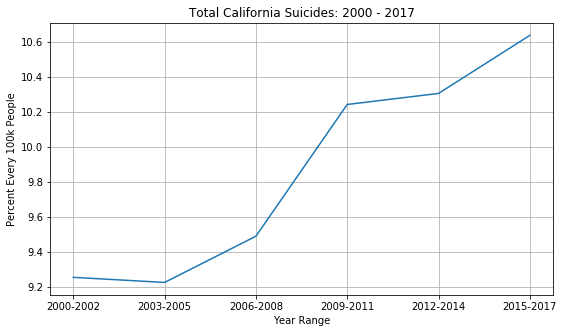

In [36]:
x_axis = suicide_cali_total['Year'].tolist()
y_axis = suicide_cali_total['% for every 100K'].tolist()
plt.figure(figsize=(9, 5))
plt.plot(x_axis, y_axis)
plt.title('Total California Suicides: 2000 - 2017')
plt.xlabel('Year Range')
plt.ylabel('Percent Every 100k People')
plt.grid()
plt.savefig('Total California Suicides.png')

## California - Sex

In [6]:
# Isolates california wide suicides by sex.

cali_bysex = suicide_cali['Strata'] == 'Sex'
suicide_cali_sex = suicide_cali[cali_bysex]
suicide_cali_sex = suicide_cali_sex.reset_index()
suicide_cali_sex = suicide_cali_sex.drop(columns=['index'])

suicide_cali_sex

,Geography,Year,Strata,Strata Name,Numerator,Denominator
0,CALIFORNIA,2000,Sex,Female,682,17080000
1,CALIFORNIA,2000,Sex,Male,2431,16920000
2,CALIFORNIA,2000,Sex,Total,3113,34000000
3,CALIFORNIA,2001,Sex,Female,685,17340000
4,CALIFORNIA,2001,Sex,Male,2571,17170000
...,...,...,...,...,...,...
67,CALIFORNIA,2012-2014,Sex,Male,9163,57270000
68,CALIFORNIA,2012-2014,Sex,Total,11870,115200000
69,CALIFORNIA,2015-2017,Sex,Female,2916,59330000
70,CALIFORNIA,2015-2017,Sex,Male,9642,58780000


In [28]:
cali_byfemale = suicide_cali_sex['Strata Name'] == 'Female'
suicide_cali_female = suicide_cali_sex[cali_byfemale]
suicide_cali_female = suicide_cali_female.reset_index()
suicide_cali_female = suicide_cali_female.drop(columns=['index'])
suicide_cali_female = suicide_cali_female.drop(suicide_cali_female.index[0:18])
suicide_cali_female = suicide_cali_female.reset_index()
suicide_cali_female = suicide_cali_female.drop(columns=['index'])
suicide_cali_female['% for every 100K'] = ((suicide_cali_female['Numerator'] / suicide_cali_female['Denominator']) * 100000)

suicide_cali_female

,Geography,Year,Strata,Strata Name,Numerator,Denominator,% for every 100K
0,CALIFORNIA,2000-2002,Sex,Female,2077,51970000,3.996536
1,CALIFORNIA,2003-2005,Sex,Female,2275,53840000,4.225483
2,CALIFORNIA,2006-2008,Sex,Female,2397,55120000,4.348694
3,CALIFORNIA,2009-2011,Sex,Female,2691,56350000,4.775510
4,CALIFORNIA,2012-2014,Sex,Female,2711,57880000,4.683829
5,CALIFORNIA,2015-2017,Sex,Female,2916,59330000,4.914883


In [34]:
cali_bymale = suicide_cali_sex['Strata Name'] == 'Male'
suicide_cali_male = suicide_cali_sex[cali_bymale]
suicide_cali_male = suicide_cali_male.reset_index()
suicide_cali_male = suicide_cali_male.drop(columns=['index'])
suicide_cali_male = suicide_cali_male.drop(suicide_cali_male.index[0:18])
suicide_cali_male = suicide_cali_male.reset_index()
suicide_cali_male = suicide_cali_male.drop(columns=['index'])
suicide_cali_male['% for every 100K'] = ((suicide_cali_male['Numerator'] / suicide_cali_male['Denominator']) * 100000)

suicide_cali_male

,Geography,Year,Strata,Strata Name,Numerator,Denominator,% for every 100K
0,CALIFORNIA,2000-2002,Sex,Male,7502,51480000,14.572650
1,CALIFORNIA,2003-2005,Sex,Male,7605,53290000,14.270970
2,CALIFORNIA,2006-2008,Sex,Male,8017,54540000,14.699303
3,CALIFORNIA,2009-2011,Sex,Male,8790,55740000,15.769645
4,CALIFORNIA,2012-2014,Sex,Male,9163,57270000,15.999651
5,CALIFORNIA,2015-2017,Sex,Male,9642,58780000,16.403539


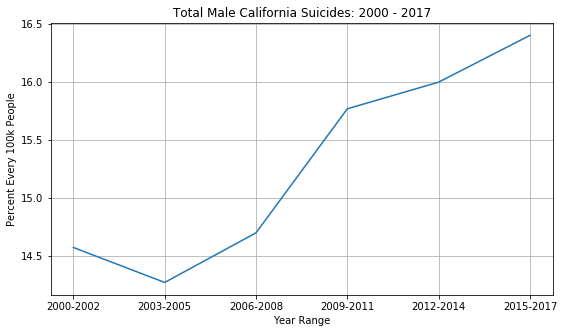

In [48]:
x_male = suicide_cali_male['Year'].tolist()
y_male = suicide_cali_male['% for every 100K'].tolist()
x_axis = suicide_cali_total['Year'].tolist()
y_axis = suicide_cali_total['% for every 100K'].tolist()
plt.figure(figsize=(9, 5))
#plt.plot(x_axis, y_axis)
plt.plot(x_male, y_male)
plt.title('Total Male California Suicides: 2000 - 2017')
plt.xlabel('Year Range')
plt.ylabel('Percent Every 100k People')
plt.grid()
plt.savefig('Total Male California Suicides.png')

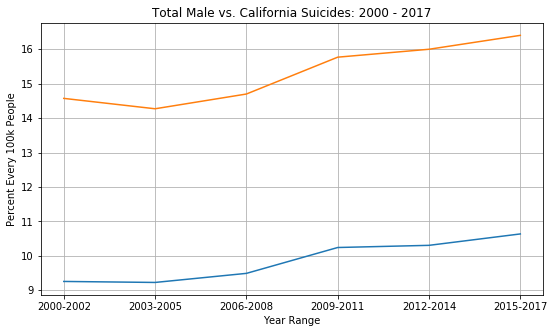

In [50]:
plt.figure(figsize=(9, 5))
plt.plot(x_axis, y_axis)
plt.plot(x_male, y_male)
plt.title('Total Male vs. California Suicides: 2000 - 2017')
plt.xlabel('Year Range')
plt.ylabel('Percent Every 100k People')
plt.grid()
plt.savefig('Total Male vs. California Suicides.png')

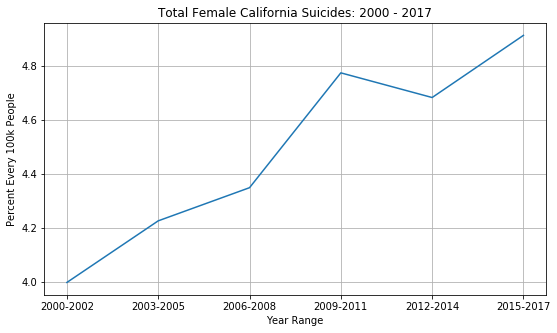

In [44]:
x_female = suicide_cali_female['Year'].tolist()
y_female = suicide_cali_female['% for every 100K'].tolist()
x_axis = suicide_cali_total['Year'].tolist()
y_axis = suicide_cali_total['% for every 100K'].tolist()
plt.figure(figsize=(9, 5))
#plt.plot(x_axis, y_axis)
plt.plot(x_female, y_female)
plt.title('Total Female California Suicides: 2000 - 2017')
plt.xlabel('Year Range')
plt.ylabel('Percent Every 100k People')
plt.grid()
plt.savefig('Total Female California Suicides.png')

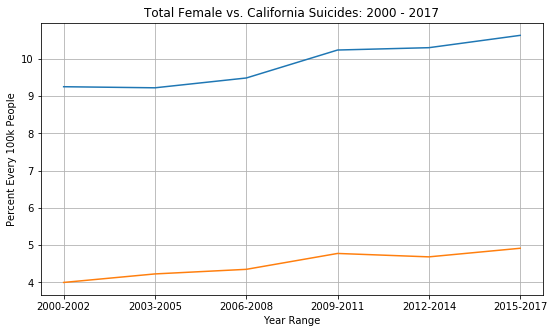

In [54]:
plt.figure(figsize=(9, 5))
plt.plot(x_axis, y_axis)
plt.plot(x_female, y_female)
plt.title('Total Female vs. California Suicides: 2000 - 2017')
plt.xlabel('Year Range')
plt.ylabel('Percent Every 100k People')
plt.grid()
plt.savefig('Total Female vs. California Suicides.png')

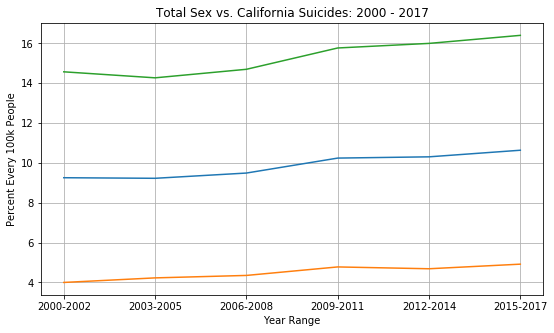

In [53]:
plt.figure(figsize=(9, 5))
plt.plot(x_axis, y_axis)
plt.plot(x_female, y_female)
plt.plot(x_male, y_male)
plt.title('Total Sex vs. California Suicides: 2000 - 2017')
plt.xlabel('Year Range')
plt.ylabel('Percent Every 100k People')
plt.grid()
plt.savefig('Total Sex vs. California Suicides.png')

## California - Race

In [46]:
# Isolates california wide suicides by race.

cali_byrace = suicide_cali['Strata'] == 'Race/Ethnicity'
suicide_cali_race = suicide_cali[cali_byrace]
suicide_cali_race = suicide_cali_race.reset_index()
suicide_cali_race = suicide_cali_race.drop(columns=['index'])

suicide_cali_race

,Geography,Year,Strata,Strata Name,Numerator,Denominator
0,CALIFORNIA,2000-2002,Race/Ethnicity,AIAN-NH,41,531100
1,CALIFORNIA,2000-2002,Race/Ethnicity,Asian-NH,658,11980000
2,CALIFORNIA,2000-2002,Race/Ethnicity,Black-NH,430,6624000
3,CALIFORNIA,2000-2002,Race/Ethnicity,Hisp,1380,34400000
4,CALIFORNIA,2000-2002,Race/Ethnicity,Multi-NH,41,1964000
5,CALIFORNIA,2000-2002,Race/Ethnicity,NHPI-NH,26,342600
6,CALIFORNIA,2000-2002,Race/Ethnicity,White-NH,6990,47610000
7,CALIFORNIA,2003-2005,Race/Ethnicity,AIAN-NH,46,518900
8,CALIFORNIA,2003-2005,Race/Ethnicity,Asian-NH,719,12740000
9,CALIFORNIA,2003-2005,Race/Ethnicity,Black-NH,388,6673000


In [47]:
cali_race_group = suicide_cali_race.groupby(['Year', 'Strata Name'])
cali_race_group.sum()

Numerator  Denominator
Year      Strata Name                        
2000-2002 AIAN-NH             41       531100
          Asian-NH           658     11980000
          Black-NH           430      6624000
          Hisp              1380     34400000
          Multi-NH            41      1964000
          NHPI-NH             26       342600
          White-NH          6990     47610000
2003-2005 AIAN-NH             46       518900
          Asian-NH           719     12740000
          Black-NH           388      6673000
          Hisp              1563     37200000
          Multi-NH            88      2247000
          NHPI-NH             33       361100
          White-NH          7027     47380000
2006-2008 AIAN-NH             47       510300
          Asian-NH           807     13420000
          Black-NH           432      6650000
          Hisp              1604     39550000
          Multi-NH           131      2477000
          NHPI-NH             30       376800
          White-NH          7349     46670000
2009-2011 AIAN-NH             59       502900
          Asian-NH           935     14330000
          Black-NH           435      6606000
          Hisp              1857     42170000
          Multi-NH           175      2752000
          NHPI-NH             42       398900
          White-NH          7937     45330000
2012-2014 AIAN-NH             60       512900
          Asian-NH           920     15060000
          Black-NH           428      6680000
          Hisp              1991     44310000
          Multi-NH           242      2993000
          NHPI-NH             41       418200
          White-NH          8154     45180000
2015-2017 AIAN-NH             74       523600
          Asian-NH          1072     15730000
          Black-NH           456      6755000
          Hisp              2482     46350000
          Multi-NH           261      3204000
          NHPI-NH             40       435000
          White-NH          8139     45010000

# All Counties

In [ ]:
# Isolates all rows without California in 'Geography'.

all_counties = suicide_df['Geography'] != 'CALIFORNIA'
suicide_counties = suicide_df[all_counties]
suicide_counties = suicide_counties.reset_index()
suicide_counties = suicide_counties.drop(columns=['Indicator', 'index', 'Rate', 'Age Adjusted Rate'])

suicide_counties

## Counties - Sex

In [ ]:
county_bysex = suicide_counties['Strata'] == 'Sex'
suicide_county_sex = suicide_counties[county_bysex]
suicide_county_sex = suicide_county_sex.reset_index()
suicide_county_sex = suicide_county_sex.drop(columns=['index'])

suicide_county_sex

### Counties - Sex - "2000-2002"

In [ ]:
count_sex_by00_02 = suicide_county_sex['Year'] == '2000-2002'
count_sex_00_02 = suicide_county_sex[count_sex_by00_02]
count_sex_00_02 = count_sex_00_02.reset_index()
count_sex_00_02 = count_sex_00_02.drop(columns=['index'])

count_sex_00_02

### Counties - Sex - "2003-2005"

In [ ]:
count_sex_by03_05 = suicide_county_sex['Year'] == '2003-2005'
count_sex_03_05 = suicide_county_sex[count_sex_by03_05]
count_sex_03_05 = count_sex_03_05.reset_index()
count_sex_03_05 = count_sex_03_05.drop(columns=['index'])

count_sex_03_05

### Counties - Sex - "2006-2008"

In [ ]:
count_sex_by06_08 = suicide_county_sex['Year'] == '2006-2008'
count_sex_06_08 = suicide_county_sex[count_sex_by06_08]
count_sex_06_08 = count_sex_06_08.reset_index()
count_sex_06_08 = count_sex_06_08.drop(columns=['index'])

count_sex_06_08

### Counties - Sex - "2009-2011"

In [ ]:
count_sex_by09_11 = suicide_county_sex['Year'] == '2009-2011'
count_sex_09_11 = suicide_county_sex[count_sex_by09_11]
count_sex_09_11 = count_sex_09_11.reset_index()
count_sex_09_11 = count_sex_09_11.drop(columns=['index'])

count_sex_09_11

### Counties - Sex - "2012-2014"

In [ ]:
count_sex_by12_14 = suicide_county_sex['Year'] == '2012-2014'
count_sex_12_14 = suicide_county_sex[count_sex_by12_14]
count_sex_12_14 = count_sex_12_14.reset_index()
count_sex_12_14 = count_sex_12_14.drop(columns=['index'])

count_sex_12_14

### Counties - Sex - "2015-2017"

In [ ]:
count_sex_by15_17 = suicide_county_sex['Year'] == '2015-2017'
count_sex_15_17 = suicide_county_sex[count_sex_by15_17]
count_sex_15_17 = count_sex_15_17.reset_index()
count_sex_15_17 = count_sex_15_17.drop(columns=['index'])

count_sex_15_17

## Counties - Race

In [ ]:
county_byrace = suicide_counties['Strata'] == 'Race/Ethnicity'
suicide_county_race = suicide_counties[county_byrace]
suicide_county_race = suicide_county_race.reset_index()
suicide_county_race = suicide_county_race.drop(columns=['index'])

suicide_county_race

In [ ]:
county_race_groupby = suicide_county_race.groupby(['Year', 'Geography', 'Strata Name'])
county_race_groupby.sum()

### Counties - Race - "2000-2002"

In [ ]:
count_race_by00_02 = suicide_county_race['Year'] == '2000-2002'
count_race_00_02 = suicide_county_race[count_race_by00_02]
count_race_00_02 = count_race_00_02.reset_index()
count_race_00_02 = count_race_00_02.drop(columns=['index'])

count_race_00_02

In [ ]:
county_race_00_02_group = count_race_00_02.groupby(['Geography'])
totals_list = county_race_00_02_group['Numerator'].sum()
totals_list_df = pd.DataFrame(totals_list)
totals_list_df
test = totals_list_df.max()
race_max = test[0]

for index, row in totals_list_df.iterrows():
       if row["Numerator"] == race_max:
            print (index, row[0])


In [ ]:
test = totals_list_df.min()
race_min = test[0]

for index, row in totals_list_df.iterrows():
       if row["Numerator"] == race_min:
            print (index, row[0])

### Counties - Race - "2003-2005"

In [ ]:
count_race_by03_05 = suicide_county_race['Year'] == '2003-2005'
count_race_03_05 = suicide_county_race[count_race_by03_05]
count_race_03_05 = count_race_03_05.reset_index()
count_race_03_05 = count_race_03_05.drop(columns=['index'])

count_race_03_05

### Counties - Race - "2006-2008"

In [ ]:
count_race_by06_08 = suicide_county_race['Year'] == '2006-2008'
count_race_06_08 = suicide_county_race[count_race_by06_08]
count_race_06_08 = count_race_06_08.reset_index()
count_race_06_08 = count_race_06_08.drop(columns=['index'])

count_race_06_08

### Counties - Race - "2009-2011"

In [ ]:
count_race_by09_11 = suicide_county_race['Year'] == '2009-2011'
count_race_09_11 = suicide_county_race[count_race_by09_11]
count_race_09_11 = count_race_09_11.reset_index()
count_race_09_11 = count_race_09_11.drop(columns=['index'])

count_race_09_11

### Counties - Race - "2012-2014"

In [ ]:
count_race_by12_14 = suicide_county_race['Year'] == '2012-2014'
count_race_12_14 = suicide_county_race[count_race_by12_14]
count_race_12_14 = count_race_12_14.reset_index()
count_race_12_14 = count_race_12_14.drop(columns=['index'])

count_race_12_14

### Counties - Race - "2015-2017"

In [ ]:
count_race_by15_17 = suicide_county_race['Year'] == '2015-2017'
count_race_15_17 = suicide_county_race[count_race_by15_17]
count_race_15_17 = count_race_15_17.reset_index()
count_race_15_17 = count_race_15_17.drop(columns=['index'])

count_race_15_17